# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

Problem Statement:

E-News portal, an online news portal aims to expand its business by acquiring more subscribers by adding new features to their portal. The company has to analyze the user interests based on their website visit and drive for better engagement.

Objective:

The design team has created a new landing page. As a Data Scientist, the objective is to find the effectiveness of a new page and whether it is gathering more subscribers. The team conducted an experiment with a randomly selected sample of 100 users and divided them into two equal groups. One group has been given the existing landing page(control) and the other group has been given the new landing page(treatment group). Data was gathered from both the groups. The Data Science team has to perform a statistical analysis to determine the effectiveness of the new landing page gathering more subscribers at the significance level of 5%:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate for new page greater than the conversion rate for the existing page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for different language users?

Data Dictionary:

1. user_id : unique user id for people visiting the website
2. group : which group the user belongs to. The control group or the treatment group.
3. landing_page : is the landing page new or the existing one.
4. time_spent_on_the_page : the time spent by the user on the landing page.
5. converted : whether the user gets converted to a subscriber or not.
6. language_preferred : language chosen by the user on the website for viewing the page.

## Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

import nbconvert

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data into a DataFrame

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/abtest.csv')

In [ ]:
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
df.shape

(100, 6)

The dataset contains 100 rows and 6 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 2 numerical columns and 4 categorical columns.

In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.   The user id column consists of unique ids of people viewing the page.
2.   The average time spent on the page is 5.3 minutes and the median time spent on the page is 5.4 minutes.
3.   Group column has two values and it is divided equally.(control and treatment groups)
4.   Landing page column has two values and it is divided equally.(old and new)
5.   The converted column says whether the user has subscribed to the news portal or not. 54 users have subscribed to the E news.
6.   Three languages are available: English, French and Spanish. 34 users have preferred Spanish as their landing page language.

In [ ]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the dataset.

In [ ]:
df.duplicated().sum()

0

There are no duplicate rows in the dataset.

### Univariate Analysis

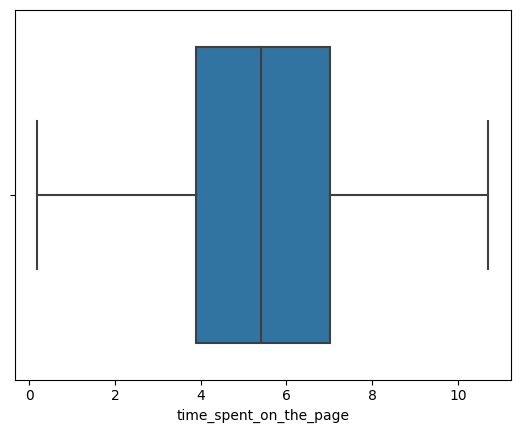

In [ ]:
sns.boxplot(data = df, x = 'time_spent_on_the_page');

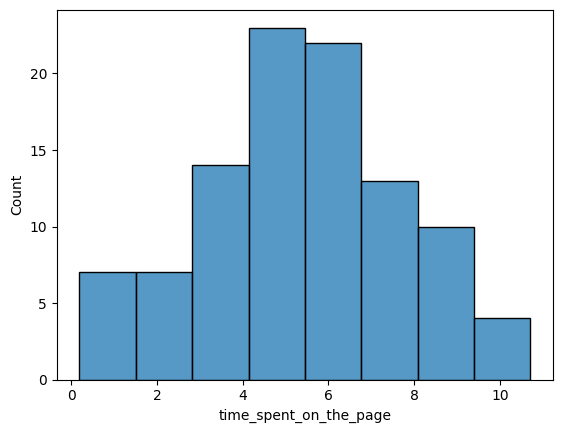

In [ ]:
sns.histplot(data = df, x = 'time_spent_on_the_page');

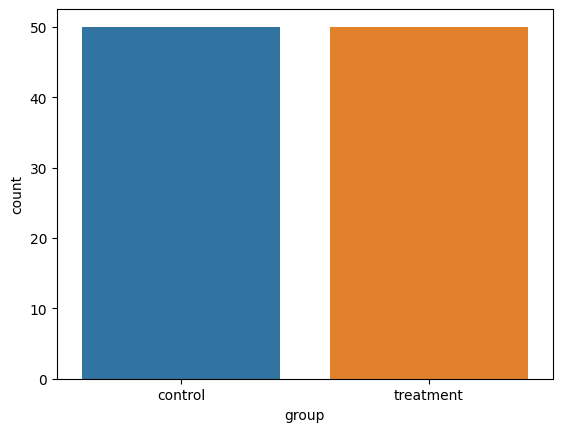

In [ ]:
sns.countplot(data = df, x = 'group');

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

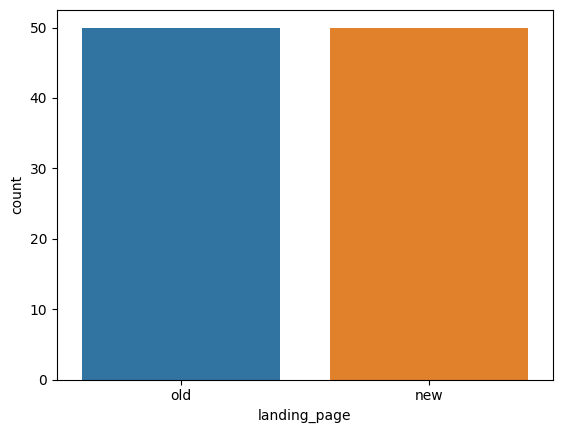

In [ ]:
sns.countplot(data = df, x = 'landing_page');

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

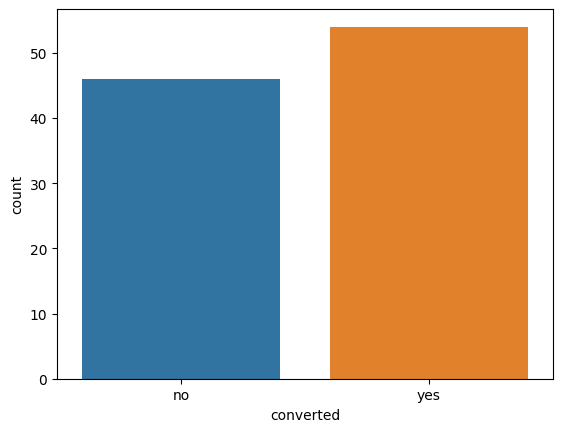

In [ ]:
sns.countplot(data = df, x = 'converted');

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

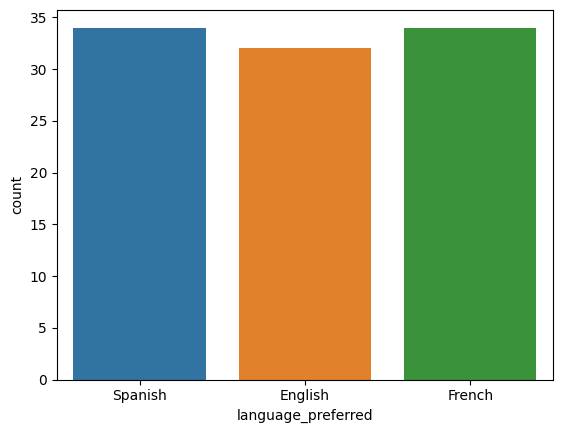

In [ ]:
sns.countplot(data = df, x = 'language_preferred');

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

Univariate Analysis Observations:

*   The median time spent on the page is 5.4 minutes. time_spent_on_the_page column is normally distributed. The minimum and the maximum time spent on the page is from 0.2 minutes to 10 minutes approximately. 50% of the users have spent between 4 to 7 minutes on the landing page.
*   50% of the users belong to treatment group and the other 50% users belong to the control group in this sample dataset.
*   Similarly 50% of the users have given the old landing page and 50% have given the new landing page in this sample dataset.
*   54% of the users have subscribed to the news portal after viewing the landing page.
*   There are 3 languages available in the landing page. English, Spanish and French. 34 users have preferred French, 34 have preferred Spanish and 32 have preferred English.

### Bivariate Analysis

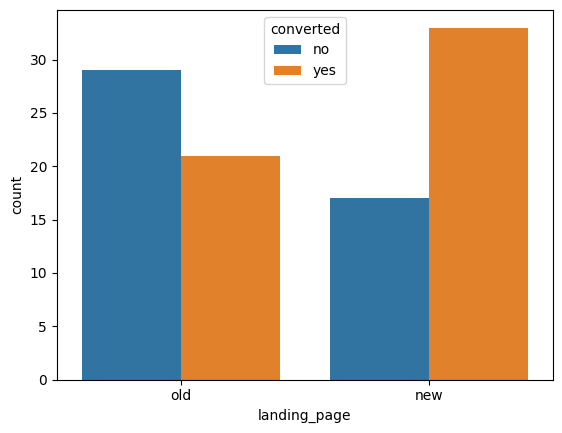

In [ ]:
sns.countplot(data = df, x = 'landing_page' , hue = 'converted');

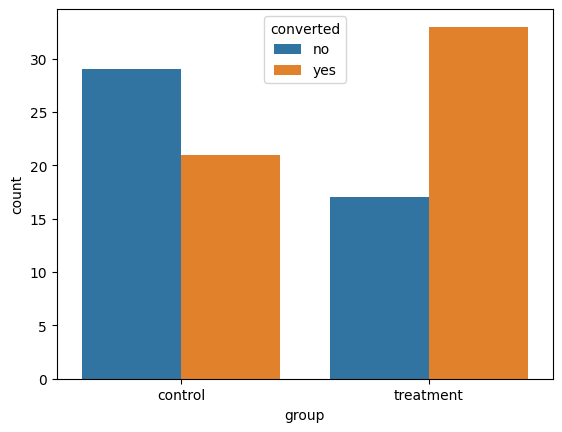

In [ ]:
sns.countplot(data = df, x = 'group' , hue = 'converted');

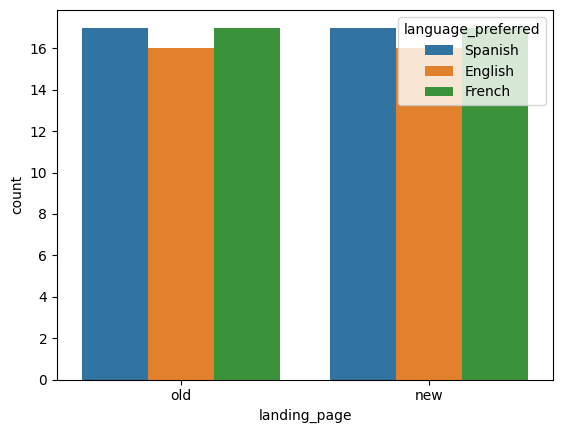

In [ ]:
sns.countplot(data = df, x = 'landing_page' , hue = 'language_preferred');

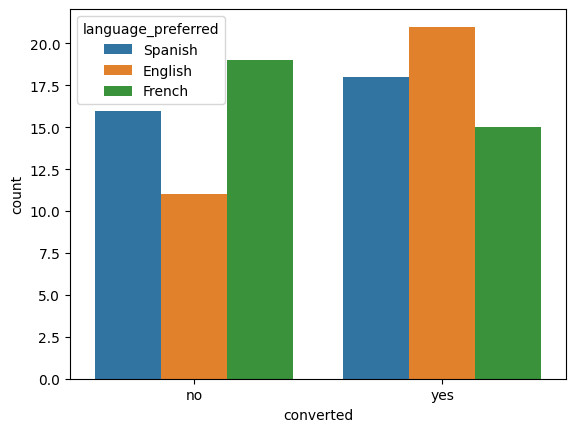

In [ ]:
sns.countplot(data = df, x = 'converted' , hue = 'language_preferred');

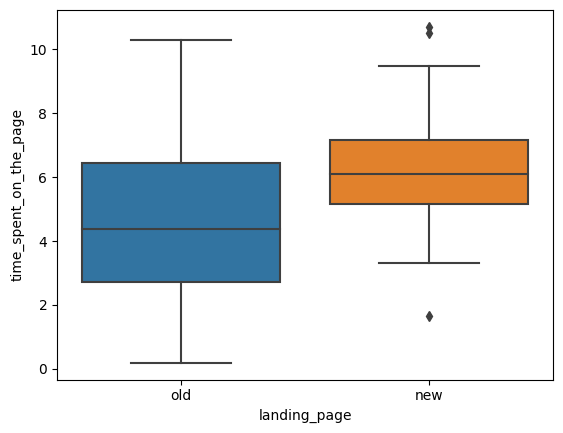

In [ ]:
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page' );

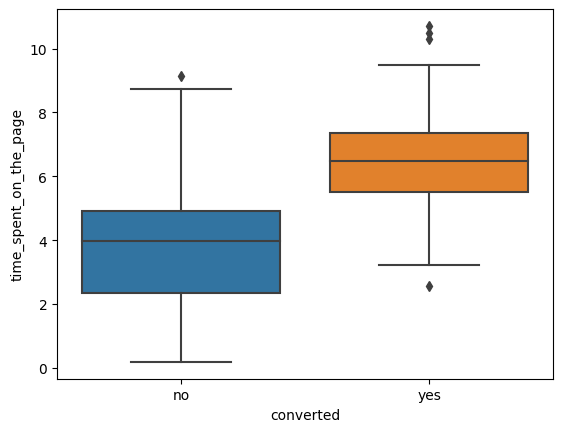

In [ ]:
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page' );

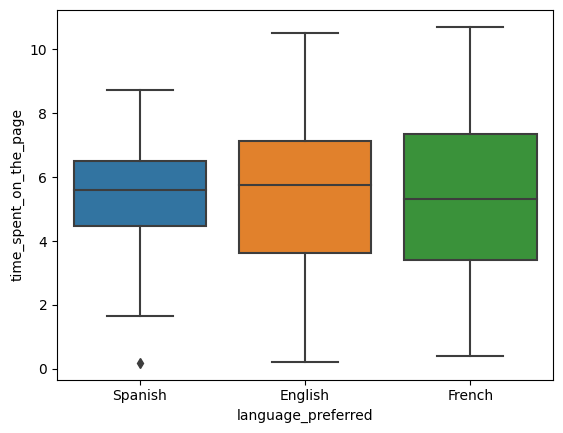

In [ ]:
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page' );

Bivariate Analysis Observations:

*   About 34 users who have used new page have subscribed to the news portal. About 29 users who have used the old page have not subscribed to the news portal.
*   The language preferred by the users from different groups are the same. 17 users have preferred Spanish on the old page and on the new page. 17 users have preferred French on the old and new page and 16 users have preferred English on the old and new page.
*   Most of the people who have preferred English in their landing page has subscribed to the news portal. Most of the people who have not subscribed have preferred French.
*   The median of time spent on the old page is less than the median of time spent on the new page.
*   About 50% of users who have  the old page have spent approximately 3 to 6.5 minutes.
*   About 50% of users who have  the new page have spent around 5.5 to 7 minutes. There are few outliers in this.
*   Median time spent on the page who have subscribed to the portal is greater than the median time spent on the page who have not subscribed to the portal.
*   The median time spent on the page is almost the same for all languages.

Let's analyse if these observations have statistical evidence to prove whether right or wrong.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

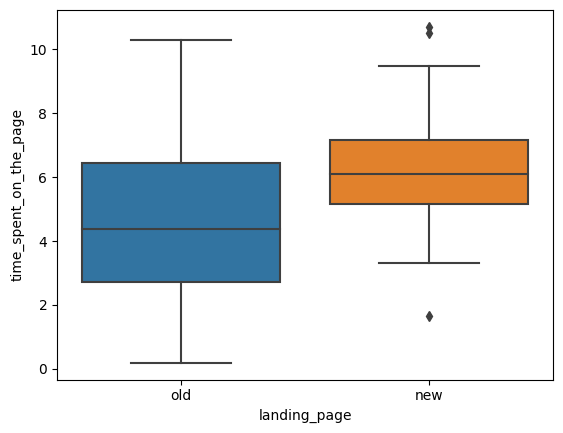

In [ ]:
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page' );

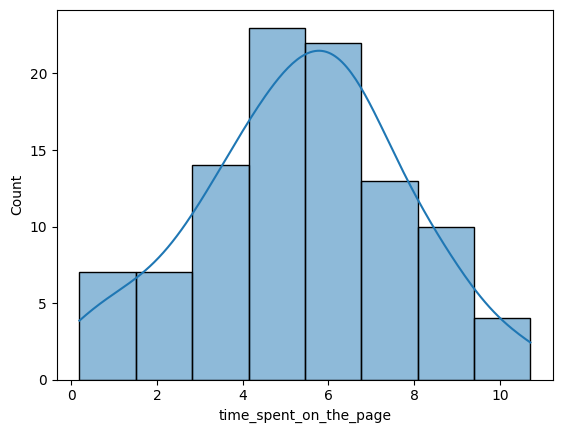

In [ ]:
sns.histplot(data = df, x= 'time_spent_on_the_page', kde = True);


*   The distribution is normally ditributed.
*   The distribution of old and new landing page seems to be different.
*   The median time spent on new landing page is more than the median time spent on the old landing page.
*   Time spent on the new landing page seems to have outliers.

### Step 1: Define the null and alternate hypotheses

The Null and Alternate Hypothesis can be defined as:

> $H_0$ : The average time spent on the new landing page is equal to the average time spent on the old landing page.

> $H_a$ : The average time spent on the new landing page is greater than the average time spent on the old landing page.

Mathematically, this can be written as

>$H_0 : \mu_1 = \mu_2 $ <br>
>$H_a : \mu_1 > \mu_2 $

Here $\mu_1$ is average time spent on the new landing page and $\mu_2$ is the average time spent on the old landing page.

### Step 2: Select Appropriate test

This is a case of one-tailed test comparing two population means and the standard deviation is unknown. Hence, two-sample t-test is appropriate for this case.

### Step 3: Decide the significance level

From the problem statement, we can consider $α = 0.05 $

### Step 4: Collect and prepare data

In [ ]:
df_new_page = df.loc[df['landing_page'] == 'new']

In [ ]:
df_old_page = df.loc[df['landing_page'] == 'old']

In [ ]:
df_old_page['time_spent_on_the_page'].std().round(2)

2.58

In [ ]:
df_new_page['time_spent_on_the_page'].std().round(2)

1.82

### Step 5: Calculate the p-value

In [ ]:
test_stat, pval = stats.ttest_ind(df_new_page['time_spent_on_the_page'], df_old_page['time_spent_on_the_page'], alternative = 'greater', equal_var = False)
print("The p value is",pval)

The p value is 0.0001392381225166549


Since the sample standard deviations are not equal we have used equal_var = False.

alternative = greater is used since it is a one tailed test and we are checking if the average time spent on the new landing page is greater than the average time spent on the old landing page.

### Step 6: Compare the p-value with $\alpha$

In [ ]:
if pval < 0.05:
  print("There is enough statistical evidence to reject the null hypothesis since",pval,"is less than 0.05")
else:
  print("There is not enough statistical evidence to reject the null hypothesis since",pval,"is greater than 0.05")

There is enough statistical evidence to reject the null hypothesis since 0.0001392381225166549 is less than 0.05


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. We have enough evidence to say that the average time spent on the new landing page is greater than the average time spent on the old landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [ ]:
pd.crosstab(df.landing_page , df.converted)

converted,no,yes
landing_page,,
new,17,33
old,29,21


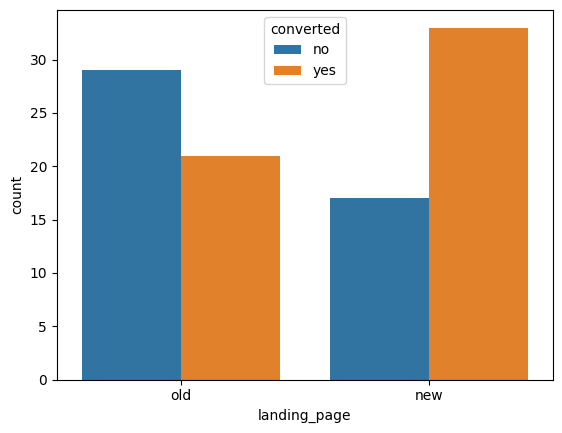

In [ ]:
sns.countplot(data = df, x = 'landing_page' , hue = 'converted');


*   Based on the visual we can say that proportion of the subscribed users is more in new page users than the old page users.
*   Not many old page users have subscribed to the news portal.

### Step 1: Define the null and alternate hypotheses

The Null and Alternate Hypothesis can be defined as:

> $H_0$ : The proportion of the new page users who have subscribed to the news portal is equal to the proportion of the old page users who have subscribed to the news portal.

> $H_a$ : The proportion of the new page users who have subscribed to the news portal is greater than the proportion of the old page users who have subcribed to the news portal

Mathematically, this can be written as

>$H_0 : p_1 = p_2 $ <br>
>$H_a : p_1 > p_2 $

Here $p_1$ is the proportion of the new page users who have subscribed to the news portal and $p_2$ is the proportion of the old page users who have subscribed to the news portal.

### Step 2: Select Appropriate test

This is the case of one tailed test where we are calculating proportions (old/new landing page and have/have not subscribed to the news portal) of two populations. Hence a two-sample proportion z-test is used for this case.

### Step 3: Decide the significance level

From the problem statement, we can consider $α = 0.05 $

### Step 4: Collect and prepare data

In [ ]:
df_new_page.shape

(50, 6)

In [ ]:
df_old_page.shape

(50, 6)

In [ ]:
df_new_converted = df_new_page.loc[df_new_page['converted'] == 'yes']

In [ ]:
df_old_converted = df_old_page.loc[df_old_page['converted'] == 'yes']

In [ ]:
df_new_converted.shape

(33, 6)

In [ ]:
df_old_converted.shape

(21, 6)

In [ ]:
counts = np.array([df_new_converted.shape[0], df_old_converted.shape[0]])
print("The number of users who have converted from new page and old page are",counts[0],"and",counts[1],"respectively")
nobs = np.array([df_new_page.shape[0], df_old_page.shape[0]])
print("The total number of users from new page and old page are",nobs[0],"and",nobs[1],"respectively")

The number of users who have converted from new page and old page are 33 and 21 respectively
The total number of users from new page and old page are 50 and 50 respectively


### Step 5: Calculate the p-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

test_stat,pval = proportions_ztest(counts,nobs,alternative = 'larger')
print("the p value is",pval)

the p value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if pval < 0.05:
  print("There is enough statistical evidence to reject the null hypothesis since",pval,"is less than 0.05")
else:
  print("There is not enough statistical evidence to reject the null hypothesis since",pval,"is greater than 0.05")

There is enough statistical evidence to reject the null hypothesis since 0.008026308204056278 is less than 0.05


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, there is enough statistical evidence to say that the proportion of new page users who have subscribed to the news portal is greater than the proportion of the old page users who have subscribed to the news portal.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

In [ ]:
pd.crosstab(df.language_preferred , df.converted)

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


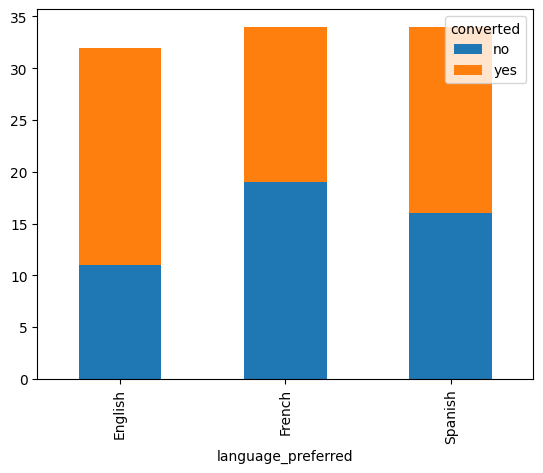

In [ ]:
pd.crosstab(df.language_preferred , df.converted).plot(kind = 'bar', stacked = True);


*   From the plot, we can say that the more number of users who have preferred English have subscribed to the news portal.
*   More number of users who have preferred French have not subscribed to the news portal.

### Step 1: Define the null and alternate hypotheses

The Null and Alternate Hypothesis can be defined as:

> $H_0$ : The users getting converted is independent of the language preferred.

> $H_a$ : The users getting converted is not independent of the language preferred.

### Step 2: Select Appropriate test

This case can be tested by using Chi Square test of independence as it concerns two categorical variables. The converted and the language_preferred columns of the dataset.

### Step 3: Decide the significance level

From the problem statement, we can consider $α = 0.05 $

### Step 4: Collect and prepare data

In [ ]:
contingency_table = pd.crosstab(df.converted, df.language_preferred)
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [ ]:
chi,pval,dof,expected_freq = stats.chi2_contingency(contingency_table)
print("The value of p is",pval)

The value of p is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if pval < 0.05:
  print("There is enough statistical evidence to reject the null hypothesis since",pval,"is less than 0.05")
else:
  print("There is not enough statistical evidence to reject the null hypothesis since",pval,"is greater than 0.05")

There is not enough statistical evidence to reject the null hypothesis since 0.21298887487543447 is greater than 0.05


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, there is not enough statistical evidence to reject the null hypothesis. Hence, the users getting converted and the language preferred are independent of each other.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

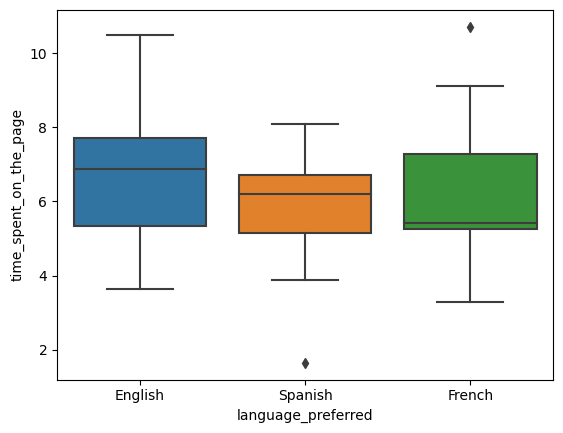

In [ ]:
sns.boxplot(data = df_new_page , x = 'language_preferred' , y = 'time_spent_on_the_page');

In [ ]:
round(df_new_page.groupby(['language_preferred'])['time_spent_on_the_page'].mean(),2)

language_preferred
English    6.66
French     6.20
Spanish    5.84
Name: time_spent_on_the_page, dtype: float64


*   From the above plot, the median of the time spent on the new page in French is comparatively less than the time spent on the new page in other two languages.
*   From the sample dataset we see that the mean time spent on the new page with preferred language Spanish is less than the time spent on the new page in other two languages.

### Step 1: Define the null and alternate hypotheses

The Null and Alternate Hypothesis can be defined as:

> $H_0$ : The average time spent on the new landing page is equal for any preferred language.

> $H_a$ : The average time spent on the new landing page is different for atleast one preferred language.

### Step 2: Select Appropriate test

In this case, we are comparing three populations means. Hence, one-way ANOVA test is appropriate for this case.

# **Shapiro-Wilk's Test:**

The Null and Alternate Hypothesis can be defined as:

> $H_0$ : The average time spent on the new landing page follows a normal distribution

> $H_a$ : The average time spent on the new landing page does not follow a normal distribution

In [ ]:
test_stat, pval = stats.shapiro(df_new_page['time_spent_on_the_page'])
print('The value of p is',pval)

The value of p is 0.8040016293525696


Since the p-value is greater than 5% significance, there is not enough statistical evidence to reject the null hypothesis. Hence we can say it is normally distributed.

# **Levene's Test:**

The Null and Alternate Hypothesis can be defined as:

> $H_0$ : The population of all groups have equal variance.

> $H_a$ : Atleast one of the population variance is not same.

In [ ]:
test_stat, pval = stats.levene(df_new_page[df_new_page['language_preferred'] == 'English']['time_spent_on_the_page'],
                               df_new_page[df_new_page['language_preferred'] == 'Spanish']['time_spent_on_the_page'],
                               df_new_page[df_new_page['language_preferred'] == 'French']['time_spent_on_the_page'])
print("The value of p is",pval)

The value of p is 0.46711357711340173


Since the p-value is greater than 5% significance, there is not enough statistical evidence to reject the null hypothesis. Hence we can say the population of all groups have equal variance.

### Step 3: Decide the significance level

From the problem statement, we can consider $α = 0.05 $

### Step 4: Collect and prepare data

In [ ]:
df_new_page_english = df_new_page.loc[df_new_page['language_preferred'] == 'English']
df_new_page_french = df_new_page.loc[df_new_page['language_preferred'] == 'French']
df_new_page_spanish = df_new_page.loc[df_new_page['language_preferred'] == 'Spanish']

### Step 5: Calculate the p-value

In [ ]:
test_stat,pval = stats.f_oneway(df_new_page_english['time_spent_on_the_page'],df_new_page_french['time_spent_on_the_page'],df_new_page_spanish['time_spent_on_the_page'])
print('The value of p is',pval)

The value of p is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if pval < 0.05:
  print("There is enough statistical evidence to reject the null hypothesis since",pval,"is less than 0.05")
else:
  print("There is not enough statistical evidence to reject the null hypothesis since",pval,"is greater than 0.05")

There is not enough statistical evidence to reject the null hypothesis since 0.43204138694325955 is greater than 0.05


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, there is not enough statistical evidence to reject the null hypothesis. Hence the average time spent on the new landing page is the same irrespective of the language preferred.

## Conclusion and Business Recommendations

**Conclusions**:

After doing some statistical tests using the sample dataset, we can conclude by saying that:

1. The average time spent on the new landing page is greater than the average time spent on the existing landing page.
2. The users who are using the new landing page subscribe to the News portal more than the users who used the existing landing page.
3. The language preferred and the users subscribing to the portal are not related.
4. The average time spent on the new landing page does not affect which language the user has preferred.

**Recommendations:**

1. As the users spend more time on viewing the new page, the content that is put on the new page is good.
2. Because the content attracts users to subscribe to the news portal, we can make this page the permanent landing page for the news portal.
3. We can monitor the performance of the new landing page for 2-3 weeks to ensure consistency of the subscription rate in the new landing page.
4. Even though the language preferred is independent of the users subscribing to the news portal, I would suggest keeping the different languages(English, Spanish, French) used for the landing page. This makes the news portal more user-friendly.
5. We can do more statistical analysis and see if the time spent on the page and users subscribing to the news portal are related.

In [ ]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.ipynb to html
[NbConvertApp] Writing 1054678 bytes to /content/drive/My Drive/Colab Notebooks/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.html


___